首先，了解一下数据集以及目标

Dataset: using the one of most popular classification dataset which is Iris dataset. Iris dataset is having 4 features of iris flower and one target class. The flower species type is the target class which has 3 types.
The idea of implementing SVM classifier in Python is to use the iris features to train an svm classifier and use the trained svm model to predict the Iris species type.
1， Importing Iris dataset from Scikit-Learn and understand Iris dataset

In [1]:
# Required Packages 
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

In [2]:
# import iris data to model Svm classifier (3 points)
iris = datasets.load_iris()
# Using the DESCR key over the iris_dataset to describ the dataset (3 points)
iris.DESCR
# To get the iris features and the target classes (3 points)
X = iris.data
y = iris.target
# To check the target data (3 points)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


2， Visualizing the Iris dataset

2.1 Visualizing the relationship between sepal and target classes

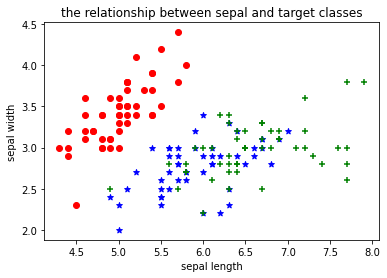

In [4]:
X = iris.data[:,:2]
y = iris.target
plt.scatter(X[y==0,0],X[y==0,1],color = 'r',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],color = 'b',marker='*')
plt.scatter(X[y==2,0],X[y==2,1],color = 'g',marker='+')
plt.title('the relationship between sepal and target classes')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

2.2 Visualizing the relationship between Petal and target classes

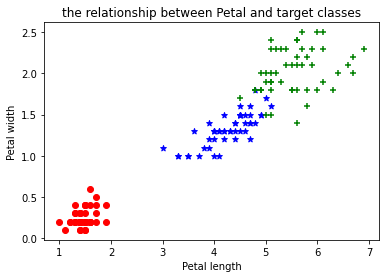

In [5]:


X = iris.data[:,2:]
y = iris.target
plt.scatter(X[y==0,0],X[y==0,1],color = 'r',marker='o')
plt.scatter(X[y==1,0],X[y==1,1],color = 'b',marker='*')
plt.scatter(X[y==2,0],X[y==2,1],color = 'g',marker='+')
plt.title('the relationship between Petal and target classes')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [6]:
# 3. Modeling Different Kernel SVM classifier using Iris Sepal features: with kernels of linear, RBF, and polynomial with degree=3


X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:2], iris.target, test_size=0.3, random_state=0)

lin_svc = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf').fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)

In [12]:
# 4. Visualizing the modeled svm classifiers with Iris Sepal features

# Notice: there are 3 plots to describ Iris Sepal features with svm classifiers about SVC with linear kernel, SVC with RBF kernel, SVC with polynomial (degree=3) kernel

In [14]:
# the step of the grid
h = .02 
# to create the grid , so that we can plot the images on it
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [20]:
xx.ravel()

array([3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88])

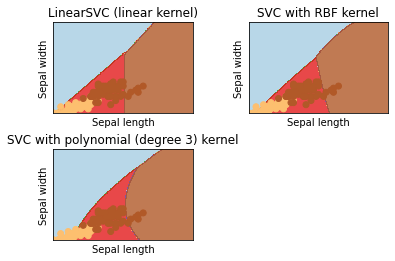

In [17]:
# the title of the graph
titles = ['LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']



for i, clf in enumerate((lin_svc, rbf_svc, poly_svc)):
    # to plot the edge of different classes
    # to create a 2*2 grid , and set the i image as current image
    plt.subplot(2, 2, i + 1) 
    # set the margin between different sub-plot
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    # SVM input :xx and yy output: an array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    # to plot the result
    Z = Z.reshape(xx.shape) #(220, 280)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()